<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.Copyright (c) 2019 [Georgina Flesia](georgina.flesia@unc.edu.ar)





# IntML2020- Análisis de Componentes y Discriminantes

# Ejercicio 1

(a) Estudie el grupo de datos sobre cancer de mama, diga cuantas clases hay, cuantos datos y cuantas variables.

In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [99]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

(b) Estudie la siguiente afirmación: "PCA finds the axes with maximum variance for the whole data set where LDA tries to find the axes for best class separability." Para ello proyecte las clases en las dos primeras componentes principales y en ''el'' discriminante. 



(c) Diga si las clases son linealmente separables en estos espacios. 

# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO  (a) AQUÍ </span>

El grupo de datos sobre cancer de mama consta de 30 atributos numéricos, los cuales son el promedio, al desviación estandar y el máximo de estos diez atributos:
   1. Radio
   2. Textura
   3. Perimetro
   4. Área
   5. Suavidad
   6. Compacidad
   7. Concavidad
   8. Puntos concavos
   9. Simetría
   10. Dimensión fractal

Hay dos clases, que son las claisificaciones de Maligno=0 y Benigno=1. El número de instancias es 569

 <span style="color:red"> RESPONDA EL INCISO  (b) AQUÍ </span>

In [100]:
print(data.target_names)
print(data.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [101]:
import pandas as pd
df_sin_target=pd.DataFrame({
    'mean radius':data.data[:,0],'mean texture':data.data[:,1],'mean perimeter':data.data[:,2],'mean area':data.data[:,3],
    'mean smoothness':data.data[:,4], 'mean compactness':data.data[:,5],'mean concavity':data.data[:,6],'mean concave points':data.data[:,7],
    'mean symmetry':data.data[:,8],'mean fractal dimension':data.data[:,9],'radius error':data.data[:,10], 'texture error':data.data[:,11],
    'perimeter error':data.data[:,12], 'area error':data.data[:,13],'smoothness error':data.data[:,14],'compactness error':data.data[:,15],
    'concavity error':data.data[:,16], 'concave points error':data.data[:,17], 'symmetry error':data.data[:,18], 'fractal dimension error':data.data[:,19],
    'worst radius':data.data[:,20],'worst texture':data.data[:,21],'worst perimeter':data.data[:,22], 'worst area':data.data[:,23],
    'worst smoothness':data.data[:,24], 'worst compactness':data.data[:,25],'worst concavity':data.data[:,26], 'worst concave points':data.data[:,27],
    'worst symmetry':data.data[:,28], 'worst fractal dimension':data.data[:,29], 
    #'clase':data.target
})

print(df_sin_target.shape)
df_sin_target.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [102]:
df_con_target=pd.DataFrame({
    'mean radius':data.data[:,0],'mean texture':data.data[:,1],'mean perimeter':data.data[:,2],'mean area':data.data[:,3],
    'mean smoothness':data.data[:,4], 'mean compactness':data.data[:,5],'mean concavity':data.data[:,6],'mean concave points':data.data[:,7],
    'mean symmetry':data.data[:,8],'mean fractal dimension':data.data[:,9],'radius error':data.data[:,10], 'texture error':data.data[:,11],
    'perimeter error':data.data[:,12], 'area error':data.data[:,13],'smoothness error':data.data[:,14],'compactness error':data.data[:,15],
    'concavity error':data.data[:,16], 'concave points error':data.data[:,17], 'symmetry error':data.data[:,18], 'fractal dimension error':data.data[:,19],
    'worst radius':data.data[:,20],'worst texture':data.data[:,21],'worst perimeter':data.data[:,22], 'worst area':data.data[:,23],
    'worst smoothness':data.data[:,24], 'worst compactness':data.data[:,25],'worst concavity':data.data[:,26], 'worst concave points':data.data[:,27],
    'worst symmetry':data.data[:,28], 'worst fractal dimension':data.data[:,29], 
    'clase':data.target
})

print(df_con_target.shape)
df_con_target.head(300)

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,clase
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794,1
296,10.91,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,0.1449,0.06031,...,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643,1
297,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,0.1619,0.06287,...,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915,0
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1


In [103]:
df_con_target.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'clase'],
      dtype='object')

In [104]:
scaled_data = StandardScaler().fit_transform(df_sin_target)

In [105]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

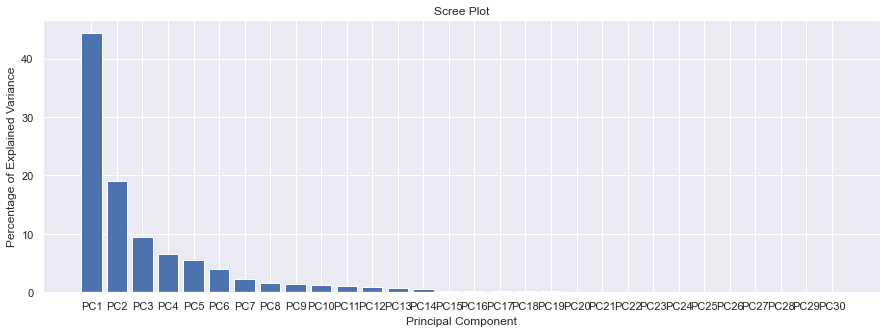

In [106]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
fig = plt.figure(figsize=(15,5))    
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [107]:
pca_data[0]

array([ 9.19283683,  1.94858307, -1.12316616,  3.6337309 , -1.19511012,
        1.41142445,  2.15936987, -0.39840723, -0.15711836, -0.87740188,
        0.26295546, -0.85901448,  0.10338766, -0.6908041 , -0.60179313,
        0.74511579, -0.26547078, -0.54956269, -0.1337675 ,  0.3455649 ,
        0.09651489,  0.06884992,  0.08451859, -0.17525628, -0.15102006,
       -0.20150345, -0.25258499, -0.03391445,  0.04564772, -0.04716921])

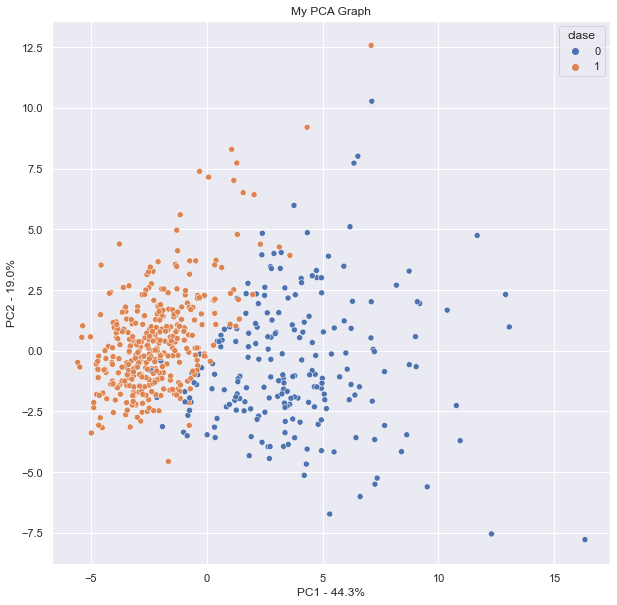

In [108]:
pca_df = pd.DataFrame(pca_data, index=range(569), columns=labels)
pca_df_targets = pca_df.join(df_con_target['clase'])

fig = plt.figure(figsize=(10,10))  
colors = {'0':'blue', '1':'orange'}
sns.scatterplot(x='PC1', y='PC2', data=pca_df_targets, hue='clase')
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
#for sample in pca_df.index:
#    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

 <span style="color:red"> RESPONDA EL INCISO  (c) AQUÍ </span>

Podemos ver que las clases no son linealmente separables ya que no podemos trazar una recta que separe ambas categorias sin error

# Ejercicio 2

Estudie el grupo de datos T8_3_FOOTBALL.dat. Se presentan 3 grupos de 30 sujetos cada uno, el primero de jugadores de futbol americano de secundaria (grupo1), el segundo de jugadores de universidad (grupo 2) y el tercero de control  (grupo 3). Las variables medidas son WDIM,CIRCUM,FBEYE,EYEHD,HEARHD,JAW, y son mediciones de la cabeza de los sujetos. 

In [109]:
import pandas as pd

df = pd.read_csv('T8_3_FOOTBALL_LDA.DAT', header=None)
df.head()

,0,1,2,3,4,5,6
0,1,13.5,57.15,19.5,12.5,14.0,11.0
1,1,15.5,58.42,21.0,12.0,16.0,12.0
2,1,14.5,55.88,19.0,10.0,13.0,12.0
3,1,15.5,58.42,20.0,13.5,15.0,12.0
4,1,14.5,58.42,20.0,3.0,15.5,12.0


In [110]:
df.columns = ['GROUP', 'WDIM', 'CIRCUM', 'FBEYE', 'EYEHD', 'HEARHD', 'JAW']
df.head()

,GROUP,WDIM,CIRCUM,FBEYE,EYEHD,HEARHD,JAW
0,1,13.5,57.15,19.5,12.5,14.0,11.0
1,1,15.5,58.42,21.0,12.0,16.0,12.0
2,1,14.5,55.88,19.0,10.0,13.0,12.0
3,1,15.5,58.42,20.0,13.5,15.0,12.0
4,1,14.5,58.42,20.0,3.0,15.5,12.0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GROUP   90 non-null     int64  
 1   WDIM    90 non-null     float64
 2   CIRCUM  90 non-null     float64
 3   FBEYE   90 non-null     float64
 4   EYEHD   90 non-null     float64
 5   HEARHD  90 non-null     float64
 6   JAW     90 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 5.0 KB


* (a) Realice un análisis discriminante sobre un 80% del conjunto datos, clasificando el 20% restante. 
* (b) Compare con los errores obtenidos clasificando con un Naive Gauss sobre el mismo conjunto de datos.
* (c) Escriba la matriz de confusion de ambos métodos. 


Para computar el error aparente puede usar la funcion 

In [112]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_iris
qda = QuadraticDiscriminantAnalysis()
(iris_data, iris_target) = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2, random_state=0)
clf = qda.fit(X_train, y_train)
clf.score(X_test, y_test) 



1.0

# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO  (a) AQUÍ </span>

In [113]:
x=df.iloc[:,[1,6]].values
y=df.iloc[:,0].values

In [114]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#clf = qda.fit(X_train, y_train)
#b = clf.score(X_test, y_test) 

lda = LinearDiscriminantAnalysis()
LDA = lda.fit(X_train, y_train)

Shape of X: (72, 2)
Shape of transformed X: (72, 2)


/tmp/ipykernel_93425/3363988884.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


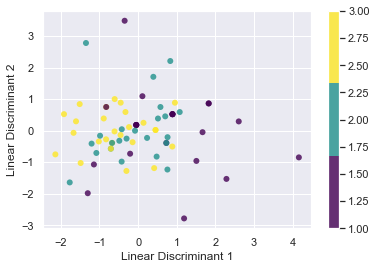

In [115]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
X_projected = lda.transform(X_train)

print("Shape of X:", X_train.shape)
print("Shape of transformed X:", X_projected.shape)

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(x1, x2, c=y_train, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

 <span style="color:red"> RESPONDA EL INCISO  (b) AQUÍ </span>

In [116]:
from sklearn.naive_bayes import GaussianNB

clf_naive = GaussianNB()
naive = clf_naive.fit(X_train, y_train)

error_naive = naive.score(X_test, y_test)
error_lda = LDA.score(X_test, y_test)
print('El error aparante con LDA es', error_lda)
print('El error aparente con Naive Gauss es', error_naive)

El error aparante con LDA ES 0.5
El error aparente con Naive Gauss es 0.3333333333333333


 <span style="color:red"> RESPONDA EL INCISO  (c) AQUÍ </span>

/home/floormolina99/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/floormolina99/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


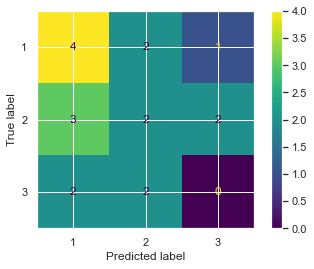

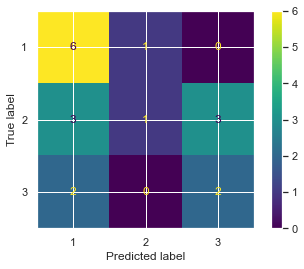

In [117]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(naive, X_test, y_test) 
plot_confusion_matrix(LDA, X_test, y_test) 
plt.show()

# Ejercicio 3:
Limpieza de ruido y selección de dimensión. 

 * (a) Trabaje con el dataset digits, estudie cuantos datos tiene, cuantas variables  y cuantas clases.

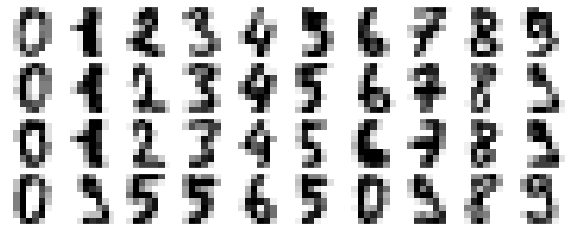

In [118]:
from sklearn.datasets import load_digits

digits = load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

* (b) Realice un análisis de componentes principales y extraiga las dos primarias. Plotee. Puede ayudarse con el siguiente código o plotear en el paquete de su agrado.

/tmp/ipykernel_93425/678763297.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


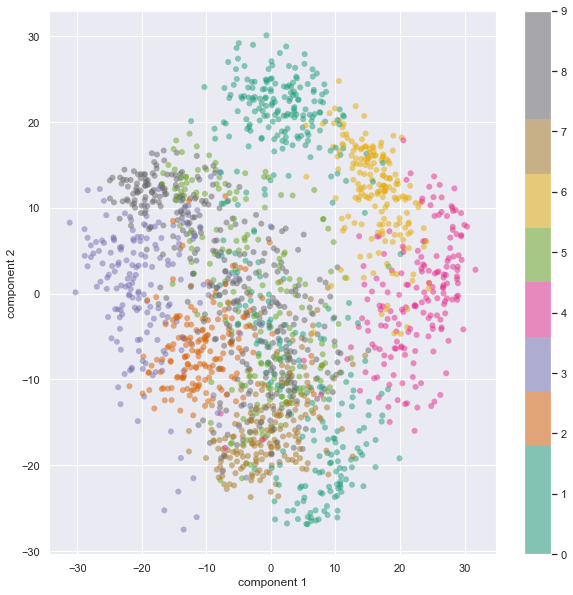

In [119]:
pca = PCA()  # project from 64 to 2 dimensions
projected_sin_ruido = pca.fit_transform(digits.data)

fig = plt.figure(figsize=(10,10))  
plt.scatter(projected_sin_ruido[:, 0], projected_sin_ruido[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Dark2', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


* (c) Explique  usando el radio de varianza explicada porque este colorido dibujo no permite distinguir clases. Cuantas dimensiones son necesarias para obtener un 50% de varianza explicada?  Y un 80%? Puede ayudarse con este plot.

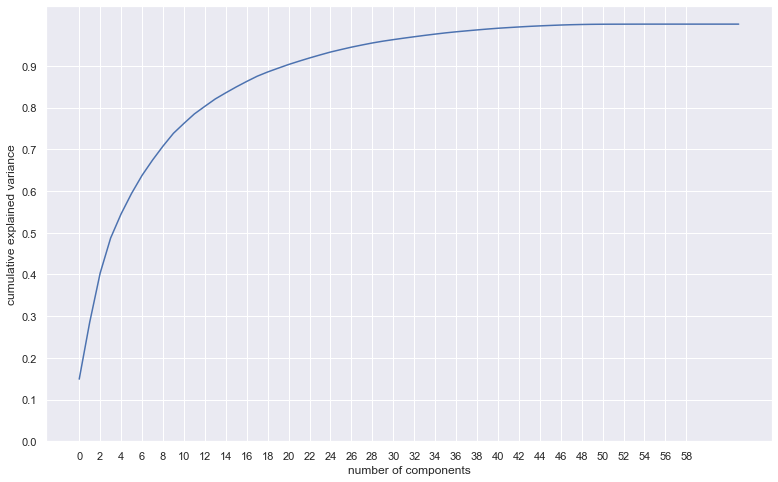

In [120]:
pca_sin_ruido = PCA().fit(digits.data)
fig = plt.figure(figsize=(13,8))  
plt.plot(np.cumsum(pca_sin_ruido.explained_variance_ratio_))
plt.xticks(np.arange(0, 60, step=2))
plt.yticks(np.arange(0, 1, step=0.1))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

* (d) Si agregamos ruido a los digitos, como en el siguiente código,  plotee el resultado y diga que tipo de ruido agregó, estudiante la documentación.

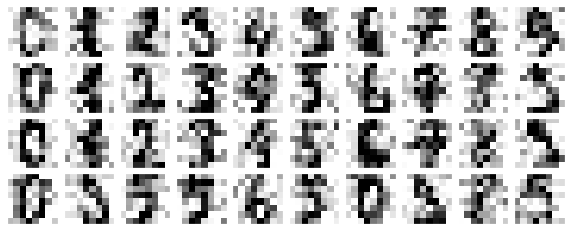

In [121]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

*  (e) Realice un análisis de componentes principales que preserve el 50% de la varianza. Diga cuantas componentes le quedan. 

* (f) Realice una clasificación con Naive Bayes sobre las primeras dos componentes, sobre las primeras 12 de los datos originales y sobre las primeras doce de los datos ruidosos. Diga cual clasificacion es mejor usando errores aparentes.

* (g) Reconstruya los datos a partir de las 12 componentes principales ruidosas y plotee el resultado. 


# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO  (a) AQUÍ </span>

El dataset digits contiene 1797 datos de digitos escritos a mano, cada uno siendo una imagen de 64 pixeles. Las clases son 10, y son los números del 0 al 9, hay aproximadamente 180 ejemplos de cada clase. El número de features son los enteros del 0 al 16. 

 <span style="color:red"> RESPONDA EL INCISO  (b) AQUÍ </span>

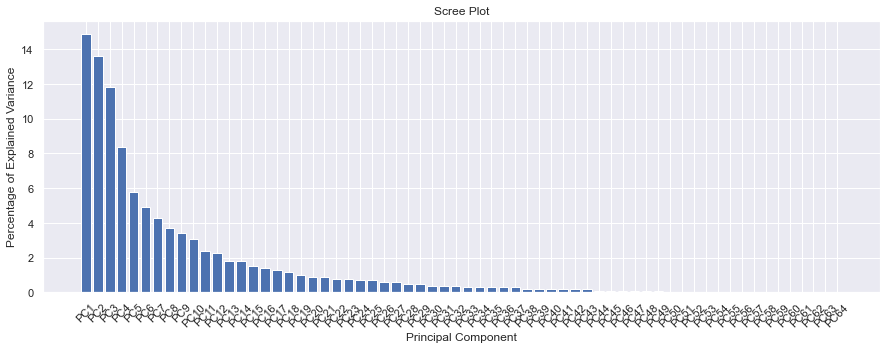

In [122]:
per_var = np.round(pca_sin_ruido.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
fig = plt.figure(figsize=(15,5))    
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.xticks(rotation=45)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Podemos ver que el dibujo no permite distinguir clases debido a que las dos principales componentes de PCA solo llevan cerca del 30% de la varianza explicada, por lo que no son suficientes para observar una variación apreciable en los datos. Observando el grafico de la varianza explicada acumulada, observamos que necesitamos 3 dimensiones para obtener un 50% de varianza y 12 para tener un 80%.

 <span style="color:red"> RESPONDA EL INCISO  (c) AQUÍ </span>

/tmp/ipykernel_93425/2998039617.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


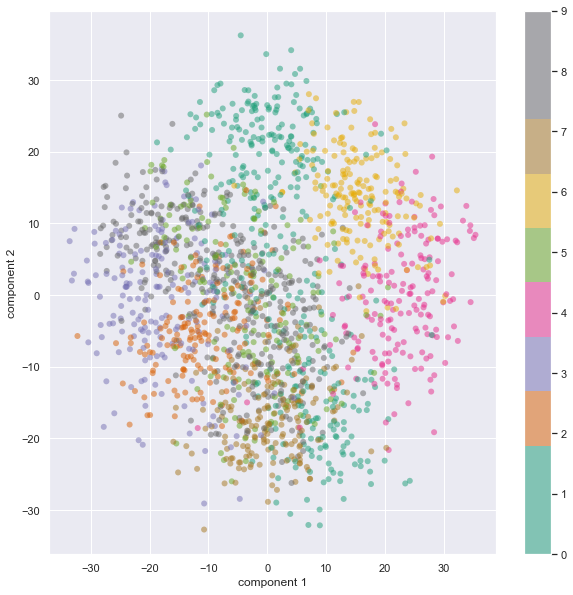

In [123]:
pca = PCA()  # project from 64 to 2 dimensions
projected_con_ruido = pca.fit_transform(noisy)

fig = plt.figure(figsize=(10,10))  
plt.scatter(projected_con_ruido[:, 0], projected_con_ruido[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Dark2', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


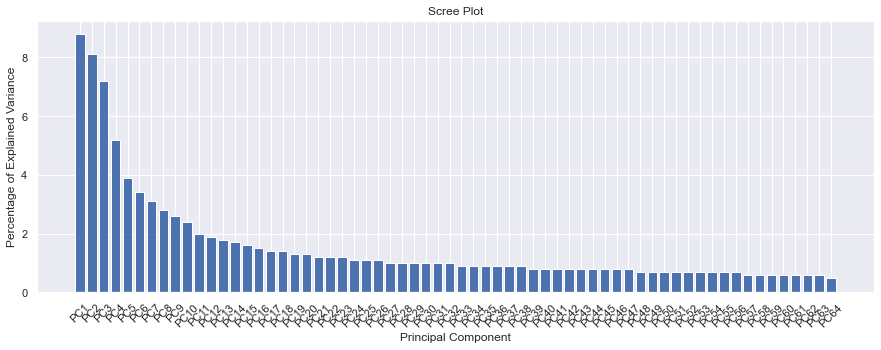

In [124]:
pca_con_ruido = PCA().fit(noisy)
per_var = np.round(pca_con_ruido.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
fig = plt.figure(figsize=(15,5))    
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.xticks(rotation=45)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

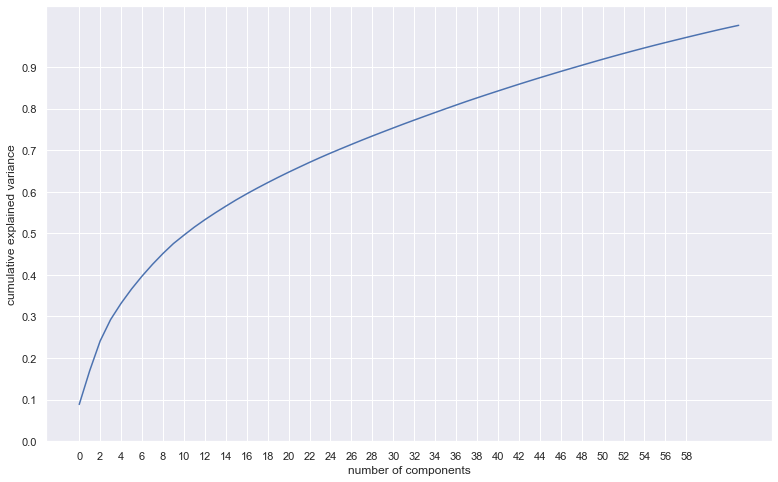

In [125]:
pca_con_ruido = PCA().fit(noisy)
fig = plt.figure(figsize=(13,8))  
plt.plot(np.cumsum(pca_con_ruido.explained_variance_ratio_))
plt.xticks(np.arange(0, 60, step=2))
plt.yticks(np.arange(0, 1, step=0.1))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Se agrega ruido con distribución normal, y la varianza en dos componentes empeora ya que ahora esta esta mucho mas distribuida entre todas las componentes de PCA y es más baja en las primeras dos. 

 <span style="color:red"> RESPONDA EL INCISO  (d) AQUÍ </span>

Se observa del gráfico del inciso anterior que para que se logre una varianza del 50% se necesitan 10 componentes ahora, a diferencia de los datos sin ruido, que necesitaban 3 componentes.

 <span style="color:red"> RESPONDA EL INCISO  (e) AQUÍ </span>

In [126]:
gnb = GaussianNB()

 <span style="color:red"> RESPONDA EL INCISO  (f) AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO  (g) AQUÍ </span>

# Ejercicio 4: 

* (a) Levante el grupo de datos Labeled Faces in the Wild dataset, y diga cuantas variables tiene, cuantos datos, cuantas clases y la dimension del espacio de discriminación.  


In [127]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)


In [128]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


* (b) Realice un estudio de componentes principales con 150 componentes, usando la keyword randomized para acelerar el algoritmo y visualize las componentes. Puede ayudarse con el sigueinte código. Explique que realiza la keyword elegida estudiando la documentacion. 


In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, svd_solver='randomized',whiten=False)
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

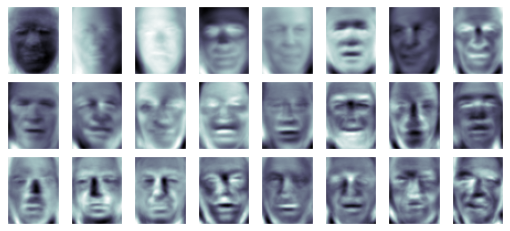

In [130]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

* (c) Diga cual es la varianza explicada por las primeras 150 componentes. 

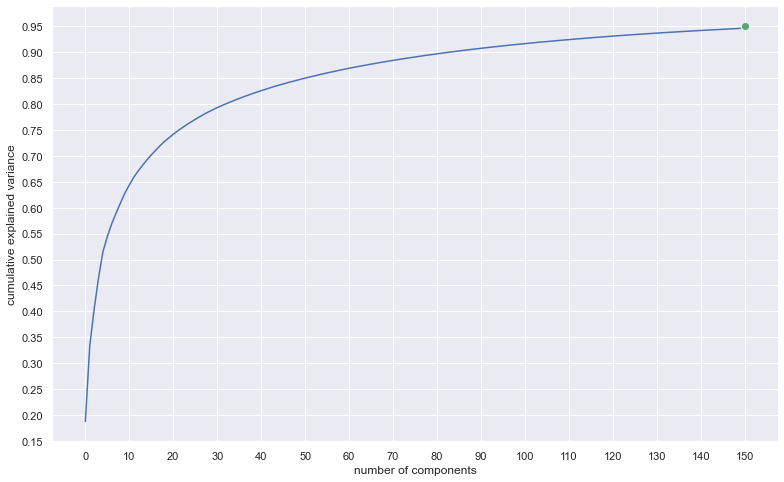

In [131]:
fig = plt.figure(figsize=(13,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.xticks(np.arange(0, 160, step=10))
plt.yticks(np.arange(0, 1, step=0.05))
li = plt.plot([150],[0.95], 'o-', color='g')
plt.ylabel('cumulative explained variance');

* (d) Elija el número de componentes que explica el 80% de la varianza y reconstruya las caras con 150 y el número elegido por Ud de componentes. plotee en tres filas las originales y las dos reconstrucciones. Puede ayudarse con el siguiente código

In [132]:
# Compute the components and projected faces

components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

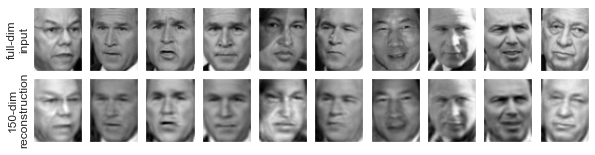

In [133]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

* (e) Clasifique las caras con el método de su elección y compute el error aparente. 
* (f) Arme la matriz de confusion del método elegido usando confusion_matrix. 

# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO  (a) AQUÍ </span>

El dataset consiste de 13233 muestras, 5749 clases, y la dimensionalidad es de 5828. Las features se componen de reales entre 0 y 255. 

 <span style="color:red"> RESPONDA EL INCISO  (b) AQUÍ </span>

El "solver" utiliza randomized por default cuando la data que le damos es mayor que 500x500 y si la cantidad de componentes a extraer es menor que el 80% de la dimensionalidad de los datos, condiciones que en nuestro caso se cumplen. En palabras del paper publicado por Halko et. al, que es de donde se extrae el metodo utilizado por scikitlearn y citado en la documentación: 

"These methods use random sampling to identify a subspace that captures most of the action of a matrix. The input matrix is then compressed—either explicitly or implicitly—to this subspace, and the reduced matrix is manipulated deterministically to obtain the desired low-rank factorization. In many cases, this approach beats its classical competitors in terms of accuracy, robustness, and/or speed." 

 <span style="color:red"> RESPONDA EL INCISO  (c) AQUÍ </span>

Guiandonos por el gráfico, con 150 componentes se alcanza a expresar el 95% de la varianza explicada.  

 <span style="color:red"> RESPONDA EL INCISO  (d) AQUÍ </span>

Observando el gráfico, podemos apreciar que con 30 componentes no se llega (por poco) al 80% de la varianza explicada, pero con 35 excedemos apenas ese valor, asi que usaremos ese número de componentes para comparar.

In [134]:
pca_150 = PCA(n_components=150, svd_solver='randomized',whiten=False)
pca_35 = PCA(n_components=35, svd_solver='randomized',whiten=False)

pca_150.fit(faces.data)
pca_35.fit(faces.data)

components_150 = pca_150.transform(faces.data)
projected_150 = pca_150.inverse_transform(components_150)
components_35 = pca_35.transform(faces.data)
projected_35 = pca_35.inverse_transform(components_35)

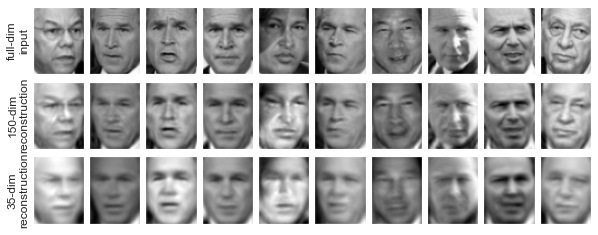

In [135]:
# Plot the results
fig, ax = plt.subplots(3, 10, figsize=(10, 4),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected_150[i].reshape(62, 47), cmap='binary_r')
    ax[2, i].imshow(projected_35[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')
ax[2, 0].set_ylabel('35-dim\nreconstruction');

 <span style="color:red"> RESPONDA EL INCISO  (e) AQUÍ </span>

In [136]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=0)
clf = gnb.fit(X_train, y_train)
a=clf.score(X_test, y_test) 
print("GNB  score",a)

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=0)
clf2 = lda.fit(X_train, y_train)
b=clf2.score(X_test, y_test) 
print("lda score",b)

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=0)
clf3 = qda.fit(X_train, y_train)
c=clf3.score(X_test, y_test) 
print("qda score",c)

GNB  score 0.4777777777777778
lda score 0.6777777777777778


/home/floormolina99/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


qda score 0.2


Se elige LDA ya que se desempeña mejor

 <span style="color:red"> RESPONDA EL INCISO  (f) AQUÍ </span>

/home/floormolina99/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


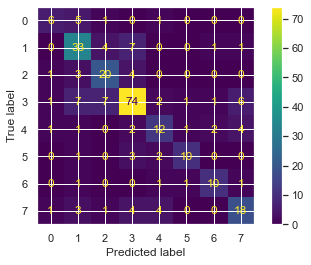

In [137]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf2, X_test, y_test) 
plt.show()